In [856]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [857]:
df=pd.read_csv(r"C:\Users\arnab\Downloads\Surveydata_train_(1).csv")
df.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [858]:
df1=pd.read_csv(r"C:\Users\arnab\Downloads\Traveldata_train_(1).csv")
df1.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [859]:
print("Total no of rows :",df.shape[0])
print("Total no of rows :",df1.shape[0])

Total no of rows : 94379
Total no of rows : 94379


In [860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

In [861]:
df.Overall_Experience.value_counts()

Overall_Experience
1    51593
0    42786
Name: count, dtype: int64

In [862]:
df.columns

Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [863]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [864]:
df1.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


<Axes: >

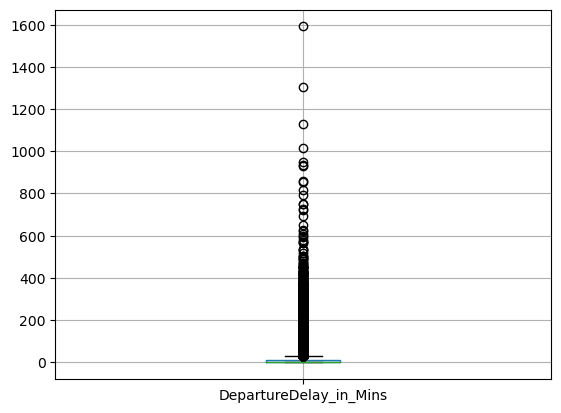

In [865]:
df1.boxplot(column='DepartureDelay_in_Mins')

In [866]:
df.Platform_location.value_counts()

Platform_location
manageable           24173
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: count, dtype: int64

In [867]:
df.Cleanliness.value_counts()

Cleanliness
good                35427
excellent           26053
acceptable          17449
need improvement     9806
poor                 5633
extremely poor          5
Name: count, dtype: int64

In [868]:
df.Onboard_service.value_counts()

Onboard_service
good                27265
excellent           21272
acceptable          18071
need improvement    11390
poor                 8776
extremely poor          4
Name: count, dtype: int64

In [869]:
df.Checkin_service.value_counts()

Checkin_service
good                26502
acceptable          25803
excellent           19641
need improvement    11218
poor                11137
extremely poor          1
Name: count, dtype: int64

In [870]:
df = df[~df['Onboard_service'].isin(['extremely poor'])]

In [871]:
df = df[~df['Checkin_service'].isin(['extremely poor'])]

In [872]:
df = df[~df['Online_support'].isin(['extremely poor'])]

In [873]:
df.Onboard_service.value_counts()

Onboard_service
good                27264
excellent           21272
acceptable          18071
need improvement    11390
poor                 8776
Name: count, dtype: int64

In [874]:
df = df[~df['Platform_location'].isin(['very inconvinient'])]


In [875]:
df.Platform_location.value_counts()

Platform_location
manageable          24172
Convinient          21911
need improvement    17832
Inconvinient        16449
very convinient     13978
Name: count, dtype: int64

In [876]:
df = df[~df['Cleanliness'].isin(['extremely poor'])]

In [877]:
df.Cleanliness.value_counts()

Cleanliness
good                35427
excellent           26053
acceptable          17449
need improvement     9806
poor                 5630
Name: count, dtype: int64

In [878]:
df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8928
Catering                   8740
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7600
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [879]:
df.columns


Index(['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [880]:
df1.columns

Index(['ID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

In [881]:
df['Overall_Experience'].value_counts()

Overall_Experience
1    51591
0    42780
Name: count, dtype: int64

In [882]:
na_data = ['Seat_comfort',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']

for i in na_data:
    df[i].fillna(df[i].mode()[0], inplace=True)
    print(i)

Seat_comfort
Arrival_time_convenient
Catering
Platform_location
Onboardwifi_service
Onboard_entertainment
Online_support
Onlinebooking_Ease
Onboard_service
Leg_room
Baggage_handling
Checkin_service
Cleanliness
Online_boarding


In [883]:
df.isnull().sum()

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94371 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94371 non-null  int64 
 1   Overall_Experience       94371 non-null  int64 
 2   Seat_comfort             94371 non-null  object
 3   Seat_Class               94371 non-null  object
 4   Arrival_time_convenient  94371 non-null  object
 5   Catering                 94371 non-null  object
 6   Platform_location        94371 non-null  object
 7   Onboardwifi_service      94371 non-null  object
 8   Onboard_entertainment    94371 non-null  object
 9   Online_support           94371 non-null  object
 10  Onlinebooking_Ease       94371 non-null  object
 11  Onboard_service          94371 non-null  object
 12  Leg_room                 94371 non-null  object
 13  Baggage_handling         94371 non-null  object
 14  Checkin_service          94371 non-null  ob

In [885]:
df1.columns

Index(['ID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

In [886]:
df1.isnull().sum()

ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

In [887]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [888]:
nan_data =['Gender', 'CustomerType','TypeTravel']

for i in nan_data:
    df1[i].fillna(df1[i].mode()[0], inplace=True)
    print(i)

Gender
CustomerType
TypeTravel


In [889]:
df1.isnull().sum()

ID                          0
Gender                      0
CustomerType                0
Age                        33
TypeTravel                  0
Travel_Class                0
Travel_Distance             0
DepartureDelay_in_Mins     57
ArrivalDelay_in_Mins      357
dtype: int64

In [890]:


df1[['Age', 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']] = df1[['Age', 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].fillna(df1[['Age', 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].median())



In [891]:
df1.isnull().sum()

ID                        0
Gender                    0
CustomerType              0
Age                       0
TypeTravel                0
Travel_Class              0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [892]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [893]:
dups1 = df1.duplicated()
print('Number of duplicate rows = %d' % (dups1.sum()))

Number of duplicate rows = 0


In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94371 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94371 non-null  int64 
 1   Overall_Experience       94371 non-null  int64 
 2   Seat_comfort             94371 non-null  object
 3   Seat_Class               94371 non-null  object
 4   Arrival_time_convenient  94371 non-null  object
 5   Catering                 94371 non-null  object
 6   Platform_location        94371 non-null  object
 7   Onboardwifi_service      94371 non-null  object
 8   Onboard_entertainment    94371 non-null  object
 9   Online_support           94371 non-null  object
 10  Onlinebooking_Ease       94371 non-null  object
 11  Onboard_service          94371 non-null  object
 12  Leg_room                 94371 non-null  object
 13  Baggage_handling         94371 non-null  object
 14  Checkin_service          94371 non-null  ob

In [895]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94379 non-null  object 
 2   CustomerType            94379 non-null  object 
 3   Age                     94379 non-null  float64
 4   TypeTravel              94379 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94379 non-null  float64
 8   ArrivalDelay_in_Mins    94379 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [896]:
# df = pd.get_dummies(df,drop_first = True).astype(int)
# df.head()

In [897]:
# df1 = pd.get_dummies(df1,drop_first = True).astype(int)
# df1.head()

In [898]:
merged_df = pd.merge(df1, df, on='ID')
# merged_df_test = pd.merge(df1_test, df_test, on=['ID'])
merged_df.drop('ID',axis = 1,inplace = True)

In [899]:
merged_df.head(10)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good
5,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0,1,need improvement,...,good,excellent,good,acceptable,acceptable,good,acceptable,acceptable,acceptable,acceptable
6,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0,0,good,...,good,good,good,good,good,excellent,need improvement,excellent,acceptable,good
7,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0,0,acceptable,...,excellent,excellent,good,good,good,acceptable,good,good,good,excellent
8,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0,0,need improvement,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,need improvement,acceptable,need improvement,acceptable
9,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0,0,need improvement,...,acceptable,good,good,need improvement,need improvement,need improvement,need improvement,acceptable,need improvement,acceptable


In [900]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94371 entries, 0 to 94370
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94371 non-null  object 
 1   CustomerType             94371 non-null  object 
 2   Age                      94371 non-null  float64
 3   TypeTravel               94371 non-null  object 
 4   Travel_Class             94371 non-null  object 
 5   Travel_Distance          94371 non-null  int64  
 6   DepartureDelay_in_Mins   94371 non-null  float64
 7   ArrivalDelay_in_Mins     94371 non-null  float64
 8   Overall_Experience       94371 non-null  int64  
 9   Seat_comfort             94371 non-null  object 
 10  Seat_Class               94371 non-null  object 
 11  Arrival_time_convenient  94371 non-null  object 
 12  Catering                 94371 non-null  object 
 13  Platform_location        94371 non-null  object 
 14  Onboardwifi_service   

In [901]:
merged_df  = pd.get_dummies(merged_df ,drop_first = True).astype(int)
merged_df .head()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Eco,Seat_comfort_excellent,...,Checkin_service_poor,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,52,272,0,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,48,2200,9,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
2,43,1061,77,119,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,44,780,13,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,1981,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [902]:
merged_df.head(10)

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Eco,Seat_comfort_excellent,...,Checkin_service_poor,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,52,272,0,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,48,2200,9,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
2,43,1061,77,119,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,44,780,13,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,1981,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,44,2810,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,56,2029,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
7,65,853,0,3,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8,22,1636,1,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
9,57,306,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [903]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94371 entries, 0 to 94370
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       94371 non-null  int32
 1   Travel_Distance                           94371 non-null  int32
 2   DepartureDelay_in_Mins                    94371 non-null  int32
 3   ArrivalDelay_in_Mins                      94371 non-null  int32
 4   Overall_Experience                        94371 non-null  int32
 5   Gender_Male                               94371 non-null  int32
 6   CustomerType_disloyal Customer            94371 non-null  int32
 7   TypeTravel_Personal Travel                94371 non-null  int32
 8   Travel_Class_Eco                          94371 non-null  int32
 9   Seat_comfort_excellent                    94371 non-null  int32
 10  Seat_comfort_extremely poor               94371 non-null  

In [904]:
merged_df.columns

Index(['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins', 'Overall_Experience', 'Gender_Male',
       'CustomerType_disloyal Customer', 'TypeTravel_Personal Travel',
       'Travel_Class_Eco', 'Seat_comfort_excellent',
       'Seat_comfort_extremely poor', 'Seat_comfort_good',
       'Seat_comfort_need improvement', 'Seat_comfort_poor',
       'Seat_Class_Ordinary', 'Arrival_time_convenient_excellent',
       'Arrival_time_convenient_extremely poor',
       'Arrival_time_convenient_good',
       'Arrival_time_convenient_need improvement',
       'Arrival_time_convenient_poor', 'Catering_excellent',
       'Catering_extremely poor', 'Catering_good', 'Catering_need improvement',
       'Catering_poor', 'Platform_location_Inconvinient',
       'Platform_location_manageable', 'Platform_location_need improvement',
       'Platform_location_very convinient', 'Onboardwifi_service_excellent',
       'Onboardwifi_service_extremely poor', 'Onboardwifi_service_good

In [905]:
X = merged_df.drop(['Overall_Experience'],axis = 1)
y = merged_df['Overall_Experience']

In [906]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94371 entries, 0 to 94370
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       94371 non-null  int32
 1   Travel_Distance                           94371 non-null  int32
 2   DepartureDelay_in_Mins                    94371 non-null  int32
 3   ArrivalDelay_in_Mins                      94371 non-null  int32
 4   Gender_Male                               94371 non-null  int32
 5   CustomerType_disloyal Customer            94371 non-null  int32
 6   TypeTravel_Personal Travel                94371 non-null  int32
 7   Travel_Class_Eco                          94371 non-null  int32
 8   Seat_comfort_excellent                    94371 non-null  int32
 9   Seat_comfort_extremely poor               94371 non-null  int32
 10  Seat_comfort_good                         94371 non-null  

In [907]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.2,random_state = 1024)

In [908]:
# X_train = X_train.values
# X_validation = X_validation.values
# y_train = y_train.values
# y_validation = y_validation.values

In [909]:
# #MODEL TUNING
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#               'max_depth': [2,3,5,10,20],
#     'max_features': ['auto', 'log2'],
#     'min_samples_leaf': [5,10,20,50,100,200],
#     'n_estimators': [10,25,30,50,100,200]
#              }
# tree_clas = RandomForestClassifier(random_state=1024, n_jobs=-1)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid,n_jobs=-1, verbose=1, cv=5)
# grid_search.fit(X_train, y_train)

In [910]:
# grid_search.best_estimator_

In [911]:
# #MODEL TUNING
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#               'max_depth': [18,19,20,21,22,23,24],
#     'max_features': ['log2'],
#     'min_samples_leaf': [3,4,5,6,7],
#     'n_estimators': [180,200,210,220,240,260]
#              }
# tree_clas = RandomForestClassifier(random_state=1024, n_jobs=-1)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid,n_jobs=-1, verbose=1, cv=5)
# grid_search.fit(X_train, y_train)

In [912]:
# from scipy.stats import uniform as sp_randFloat
# from scipy.stats import randint as sp_randInt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# rf_grid = {"n_estimators": np.arange(10, 100, 5),
#            "max_depth": sp_randInt(3,10),
#            "min_samples_split": sp_randInt(2, 20),
#            "min_samples_leaf": sp_randInt(2, 20),
#            "max_features": [0.5, 1, "sqrt", "auto"],
#            "max_samples": [10000],
#           "criterion": ["gini", "entropy"],
#           "bootstrap": [True, False]}

# # Instantiate RandomizedSearchCV model
# rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, random_state=1024),
#                               param_distributions=rf_grid,n_jobs=-1,
#                               n_iter=20,
#                               cv=5,
#                               verbose=True)
# # fit
# rs_model.fit(X_train, y_train)
# print(rs_model.best_estimator_)

In [913]:
# RF_model=RandomForestClassifier(max_depth=9, max_features=0.5, max_samples=10000,
#                        min_samples_leaf=15, min_samples_split=3,
#                        n_estimators=75, n_jobs=-1, random_state=1024)
# RF_model.fit(X_train, y_train)



In [914]:
# ## Performance Matrix on train data set
# y_train_predict = RF_model.predict(X_train)
# model_score =RF_model.score(X_train, y_train)
# print(model_score)
# ## Confusion matrix on the training data

# cm = confusion_matrix(y_train, y_train_predict, labels=RF_model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF_model.classes_)
# disp.plot()


# print(metrics.classification_report(y_train, y_train_predict))

In [915]:
# probs = RF_model.predict_proba(X_train)

# probs = probs[:, 1]

# auc = roc_auc_score(y_train, probs)
# print('AUC: %.3f' % auc)

# train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# plt.plot([0, 1], [0, 1], linestyle='--')

# plt.plot(train_fpr, train_tpr)

In [916]:
# ## Performance Matrix on test data set
# y_validation_predict = RF_model.predict(X_validation)
# model_score = RF_model.score(X_validation, y_validation)
# print(model_score)
# ## Confusion matrix on the testing data

# cm = confusion_matrix(y_validation, y_validation_predict, labels=RF_model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF_model.classes_)
# disp.plot()


# print(metrics.classification_report(y_validation, y_validation_predict))

In [917]:
# probs_test = RF_model.predict_proba(X_validation)

# probs_test = probs_test[:, 1]

# auc = roc_auc_score(y_validation, probs_test)
# print('AUC: %.3f' % auc)

# test_fpr, test_tpr, test_thresholds = roc_curve(y_validation, probs_test)
# plt.plot([0, 1], [0, 1], linestyle='--')

# plt.plot(test_fpr, test_tpr);

In [918]:
# #GRADIENT BOOSTING
# from sklearn.ensemble import GradientBoostingClassifier
# parameters = {
#     "loss":['log_loss', 'exponential'],
#     "learning_rate": [ 0.5,0.7,0.9],
#     "min_samples_split": [10,15,20,25],
#     "min_samples_leaf":[2,3,4,5,6,8],
#     "max_depth":[8,10,12,14],
#     "max_features":["sqrt"],
#     "criterion": [ 'squared_error'],
#     "subsample":[ 0.8,0.85, 0.9,0.95,1.00],
#     "n_estimators":[3,5,10,15]
#     }
# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, verbose=1, n_jobs=-1)
# clf.fit(X_train, y_train)

In [919]:
# clf.best_estimator_

In [920]:
# gbcl =GradientBoostingClassifier(criterion='squared_error', learning_rate=0.7,
#                            max_depth=10, max_features='sqrt',
#                            min_samples_leaf=4, min_samples_split=20,
#                            n_estimators=10, subsample=0.95)
# gbcl.fit(X_train, y_train)

In [921]:
#randomseach_cv

In [922]:
# from scipy.stats import uniform as sp_randFloat
# from scipy.stats import randint as sp_randInt
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier()

# parameters = {"loss":['log_loss', 'exponential'],
#               "learning_rate": sp_randFloat(),
#               "min_samples_split": sp_randInt(2, 30),
#               "min_samples_leaf":sp_randInt(1, 30),
#                   "subsample"    : sp_randFloat(),
#                   "n_estimators" : sp_randInt(5, 1000),
#               "max_features":['auto', 'sqrt', 'log2'],
#               "criterion": ["friedman_mse", 'squared_error'],
#                   "max_depth": sp_randInt(2, 20)
#                  }

In [923]:
# from sklearn.model_selection import RandomizedSearchCV
# gbcl = RandomizedSearchCV(estimator=model, param_distributions = parameters,
#                                cv = 5, n_iter = 10, verbose=1, n_jobs=-1)
# gbcl.fit(X_train, y_train)
# print(gbcl.best_estimator_)

In [924]:
# gbcl.best_estimator_

In [925]:
# gbcl =GradientBoostingClassifier(criterion='squared_error',
#                            learning_rate=0.1618658594775464, loss='exponential',
#                            max_depth=11, max_features='sqrt',
#                            min_samples_leaf=21, min_samples_split=27,
#                            n_estimators=424, subsample=0.8510336319461482)
# gbcl.fit(X_train, y_train)

In [926]:
#XG_Boost

In [927]:
from scipy import stats
from scipy.stats import randint
!pip install xgboost
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [928]:
# clf = XGBClassifier(
#     objective= 'binary:logistic',
#     nthread=4,
#     seed=42
# )

# parameters = {
#     'max_depth': range (2, 15, 1),
#     'n_estimators': range(60, 500, 40),
#     'learning_rate': np.arange(0.1, 1.0, 0.1),
#     'min_child_weight': range (1, 30, 2),
#     'lambda': range (2, 15, 1),
#      "alpha":range (2, 15, 1),'gamma': np.arange(0.1, 15.0, 0.5),'subsample':np.arange(0.1, 1.0, 0.1),
#     'colsample_bytree': np.arange(0.1, 1.0, 0.1),
}

SyntaxError: unmatched '}' (3209483336.py, line 15)

In [ ]:
# clf_rndcv = GridSearchCV(
#     estimator=clf,
#     param_grid=parameters,
#     scoring = 'roc_auc',
#     n_jobs = -1,
#     cv = 10,
#     verbose=True
# )

# clf_rndcv.fit(X_train, y_train)

In [929]:
# print(grid_search.best_estimator_)

In [930]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [933]:
clf = XGBClassifier(objective = 'binary:logistic')
para_tunning = {
        'learning_rate': (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95),
        'min_child_weight': (1,5,7,11,17,23,27,32,35,41, 50),
        'gamma':(0.2,0.5,1,3,7,9,11,15),
        'subsample': (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95),
        'colsample_bytree': (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95),
        'max_depth': (1,5,7,11,17,23,27,31),
        "n_estimators": (10,50,100,150,200,250,300,350),
         'lambda': (1,5,7,11,17,23,27,31),
        "alpha":(1,5,7,11,17,23,27,31)
        }

clf_rndcv = RandomizedSearchCV(clf, 
                         param_distributions = para_tunning,
                         cv = 5,  
                         n_iter = 5,
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1,
                         random_state = 1024)
clf_rndcv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None...
                                        'gamma': (0.2, 0.5, 1, 3, 7, 9, 11, 15),
                                        'lambda': (1, 5, 7, 11, 17, 23, 27, 31),
                                        'learning_rate': (0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 0.95),
                                        'max_depth': (1, 5, 7, 11, 17, 23, 27,
                                                      31),
                                        'min_child_weight': (1, 5, 7, 11, 17,
                                                             23, 27, 32, 35, 41,
                                                             50),
                                        'n_estimators': (10, 50, 100, 150, 200,
                                                         250, 300, 350),
                                        'subsample': (0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9,
                                                      0.95)},
                   random_state=1024, scoring='accuracy', verbose=3)

In [961]:
 print(clf_rndcv.best_estimator_)

XGBClassifier(alpha=5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=15, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=11, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None, ...)


0.9507258662710607
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     34286
           1       0.96      0.95      0.95     41210

    accuracy                           0.95     75496
   macro avg       0.95      0.95      0.95     75496
weighted avg       0.95      0.95      0.95     75496



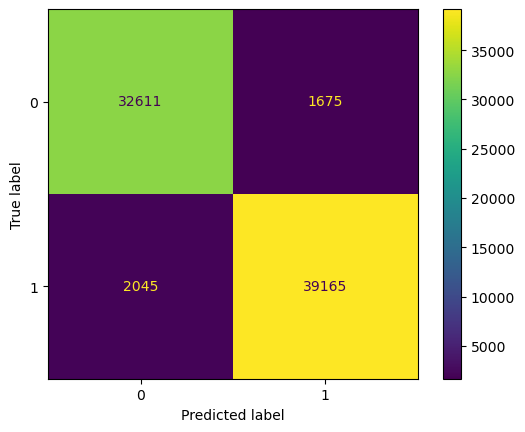

In [962]:
## Performance Matrix on train data set
y_train_predict = clf_rndcv.predict(X_train)
model_score = clf_rndcv.score(X_train, y_train)
print(model_score)
## Confusion matrix on the training data

cm = confusion_matrix(y_train, y_train_predict, labels=clf_rndcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_rndcv.classes_)
disp.plot()

print(metrics.classification_report(y_train, y_train_predict))

AUC: 0.992


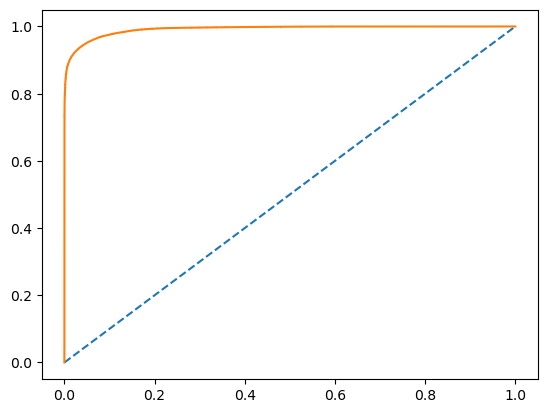

In [963]:
probs = clf_rndcv.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

0.9481854304635762
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8494
           1       0.96      0.95      0.95     10381

    accuracy                           0.95     18875
   macro avg       0.95      0.95      0.95     18875
weighted avg       0.95      0.95      0.95     18875



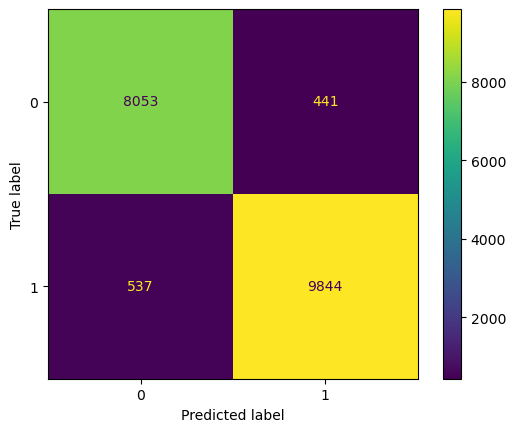

In [964]:
## Performance Matrix on test data set
y_validation_predict = clf_rndcv.predict(X_validation)
model_score = clf_rndcv.score(X_validation, y_validation)
print(model_score)
## Confusion matrix on the testing data

cm = confusion_matrix(y_validation, y_validation_predict, labels=clf_rndcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_rndcv.classes_)
disp.plot()
print(metrics.classification_report(y_validation, y_validation_predict))

AUC: 0.991


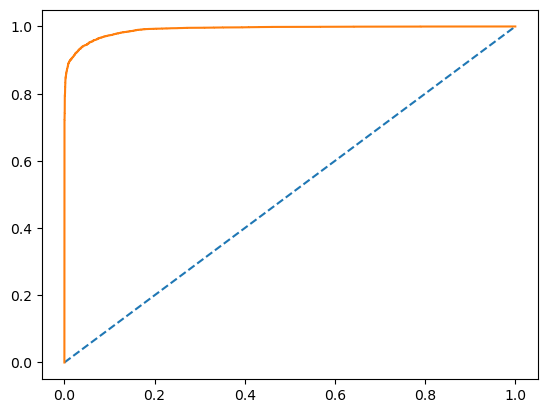

In [965]:
probs_test = clf_rndcv.predict_proba(X_validation)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_validation, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_validation, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);


In [939]:
df_test=pd.read_csv(r"C:\Users\arnab\Downloads\Surveydata_test.csv")
df1_test=pd.read_csv(r"C:\Users\arnab\Downloads\Traveldata_test.csv")

In [940]:
df_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [941]:
df_test.isnull().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [942]:
df1_test.isnull().sum()

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

In [943]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [944]:
na_test_data = ['Seat_comfort',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']

for i in na_test_data:
    df_test[i].fillna(df_test[i].mode()[0], inplace=True)
    print(i)

Seat_comfort
Arrival_time_convenient
Catering
Platform_location
Onboardwifi_service
Onboard_entertainment
Online_support
Onlinebooking_Ease
Onboard_service
Leg_room
Baggage_handling
Checkin_service
Cleanliness
Online_boarding


In [945]:
df_test.isnull().sum()


ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [946]:
nan_test_data =['Gender', 'CustomerType','TypeTravel']

for i in nan_test_data:
    df1_test[i].fillna(df1_test[i].mode()[0], inplace=True)
    print(i)


Gender
CustomerType
TypeTravel


In [947]:
df1_test[['Age', 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']] = df1_test[['Age', 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].fillna(df1_test[['Age', 'DepartureDelay_in_Mins','ArrivalDelay_in_Mins']].median())


In [948]:
df1_test.isnull().sum()

ID                        0
Gender                    0
CustomerType              0
Age                       0
TypeTravel                0
Travel_Class              0
Travel_Distance           0
DepartureDelay_in_Mins    0
ArrivalDelay_in_Mins      0
dtype: int64

In [949]:
print("Total no of rows :",df_test.shape[0])
print("Total no of rows :",df1_test.shape[0])

Total no of rows : 35602
Total no of rows : 35602


In [950]:
# merged_df_test = pd.merge(df_test, df1_test, on='ID')
# merged_df_test = df_test.merge(df1_test, on='ID')
merged_df_test = pd.merge(df1_test, df_test, on=['ID'])

In [951]:
merged_df_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,Female,Loyal Customer,36.0,Business travel,Business,532,0.0,0.0,acceptable,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,...,excellent,excellent,excellent,excellent,good,acceptable,excellent,excellent,excellent,excellent


In [952]:
test_file_ids = merged_df_test['ID'] ## necessary step
merged_df_test.drop('ID',axis = 1,inplace = True)

In [953]:
merged_df_test.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,...,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,...,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,...,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,...,excellent,excellent,excellent,excellent,good,acceptable,excellent,excellent,excellent,excellent


In [954]:
merged_df_test.shape

(35602, 23)

In [955]:
merged_df_test  = pd.get_dummies(merged_df_test ,drop_first = True).astype(int)
merged_df_test .head()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Travel_Class_Eco,Seat_comfort_excellent,Seat_comfort_extremely poor,...,Checkin_service_poor,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,36,532,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,21,1425,9,28,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,60,2832,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,29,1352,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,18,1610,17,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [956]:
# merged_df_test.replace({False: 0, True: 1}, inplace=True)

In [957]:
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       35602 non-null  int32
 1   Travel_Distance                           35602 non-null  int32
 2   DepartureDelay_in_Mins                    35602 non-null  int32
 3   ArrivalDelay_in_Mins                      35602 non-null  int32
 4   Gender_Male                               35602 non-null  int32
 5   CustomerType_disloyal Customer            35602 non-null  int32
 6   TypeTravel_Personal Travel                35602 non-null  int32
 7   Travel_Class_Eco                          35602 non-null  int32
 8   Seat_comfort_excellent                    35602 non-null  int32
 9   Seat_comfort_extremely poor               35602 non-null  int32
 10  Seat_comfort_good                         35602 non-null  

In [958]:
final_predictions = clf_rndcv.predict(merged_df_test)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Overall_Experience"},inplace=True)
# submission.to_csv('submission.csv',index = False)

In [959]:
submission.Overall_Experience.value_counts()

Overall_Experience
1    19310
0    16292
Name: count, dtype: int64

In [960]:
 submission.to_csv('submission_final.csv',index = False)